# Simulated Stock Portfolio: Enhancing Investment Success through Fundamental Analysis and Portfolio Optimization

This report aims to provide a comprehensive analysis of a simulated stock portfolio, highlighting the systematic approach of fundamental analysis, stock selection, and portfolio optimization. By leveraging financial statements, industry trends, and key financial metrics, investors identify stocks with growth potential. The selected stocks are then held for a designated period, with the objective of maximizing returns.

**The objective of this report is to present a comprehensive analysis of a simulated stock portfolio, focusing on the process of selecting stocks at the end of 2022 or the beginning of 2023.** By adopting a "buy and hold" strategy for a one-year period, we aim to evaluate the performance and returns of the chosen stocks at the end of 2023.


**It is crucial to note that the outcomes and conclusions presented in this report are based on simulated data and do not constitute financial advice.**

In [8]:
!pip install PyPortfolioOpt
!pip install yahoofinancials

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
from yahoofinancials import YahooFinancials
import plotly.express as px
from sklearn.linear_model import LinearRegression
from IPython.display import display



## Stock Data Collection


To ensure the integrity and impartiality of our analysis, **we have deliberately limited our stock selection process to recommendations and information available in the news during 2022**. By constraining our choices to this period, we aim to eliminate any potential bias or future factors that may arise from being aware of 2023 news and trends.

In [10]:

stocks_list = ['AMD','NVDA','INTC','ON','ANET','SMCI','GOOG','META','AMZN','BABA','NIO','AMC','NFLX','ADBE','TSLA','UBER','PINS','AAPL',
              'LAD','TNL','MLI','HRI','DVN','MRO','QCOM','MU','AGYS','CECO','TPL','NOV','MRC','ELF','ATI','XOM','CVX','CRM',
              'AMD','GOOGL','DECK','HAL','TMUS','WDAY','LULU','MTDR','AMGN','ADM','^GSPC']

# https://www.nasdaq.com/articles/10-top-stocks-to-buy-for-2022
# https://finance.yahoo.com/news/12-best-performing-growth-stocks-185041601.html
# https://money.usnews.com/investing/stock-market-news/articles/best-growth-stocks-to-buy
# https://www.kiplinger.com/investing/stocks/best-stocks-to-buy-now

stocks_num = len(stocks_list)-2


# Fundamental Analysis

In our analysis, we collected financial statements and ratios for each selected company, creating a data frame with columns including Symbol, Release Date, Total Revenue, Market Price, Net Income, Total Stockholder Equity, EPS, P/E Ratio, ROE, and ROCE. We focused on key financial metrics such as the P/E ratio, ROE, and ROCE.

In [11]:
def get_finanical_ratio(stocks_list, year):
    """
    Retrieves financial ratios for a list of stocks for a specific year.

    Args:
        stocks_list (list): List of stock symbols.
        year (str): Year for which the financial ratios are retrieved.

    Returns:
        pandas.DataFrame: DataFrame containing the financial ratios for each stock.
            Columns: ["Symbol", "ReleaseDate", "TotalRevenue", "MarketPrice", "NetIncome", "TotalStockholderEquity", "EPS", "P/E", "ROE", "ROCE" ]
    """

    # Create an empty DataFrame to store the financial ratios
    df = pd.DataFrame(columns=["Symbol", "ReleaseDate", "TotalRevenue", "MarketPrice", "NetIncome", "TotalStockholderEquity", "EPS", "P/E", "ROE", "ROCE" ])

    # Iterate over each stock in the stocks_list
    for stock in stocks_list:

        # Create a YahooFinancials object for the stock
        data = YahooFinancials(stock)

        # Get the income statement
        income_stat = data.get_financial_stmts(frequency = 'annual', statement_type = 'income')

        for singel_income_stat in income_stat['incomeStatementHistory'][stock]:
            for i in singel_income_stat.keys():

                # Retrieve the income statement for the specified year
                if year in i:

                    income_stat = singel_income_stat

                    release_date = i

        # Get the balance sheet
        balance_stat = data.get_financial_stmts(frequency = 'annual', statement_type = 'balance')

        for singel_balance_stat in balance_stat['balanceSheetHistory'][stock]:
            for i in singel_balance_stat.keys():

                # Retrieve the balance sheet for the specified year
                if year in i:

                    balance_stat = singel_balance_stat

        # Get the historical price data for the release date
        historical_price = data.get_historical_price_data(release_date, str(pd.to_datetime(release_date)+pd.DateOffset(months=1)).split()[0], "monthly")

        try:
          # Retrieve the market price, basic EPS, and net income
          marketPrice = historical_price[stock]['prices'][0]['close']
          totalRevenue = income_stat[release_date]["totalRevenue"]
          basicEPS = income_stat[release_date]["basicEPS"]
          netIncome = income_stat[release_date]["netIncome"]
          ebit = income_stat[release_date]["ebit"]
          totalAssets = balance_stat[release_date]['totalAssets']
          totalCurrentLiabilities = balance_stat[release_date]['currentLiabilities']
          totalStockholderEquity = balance_stat[release_date]['commonStockEquity']


          # Calculate the P/E ratio, ROE, and store the data in the DataFrame
          PE_Ratio = marketPrice/basicEPS
          ROE = netIncome/totalStockholderEquity*100
          ROCE = ebit/(totalAssets-totalCurrentLiabilities)*100
          df = df.append({
                "Symbol": stock,
                "ReleaseDate":release_date,
                "TotalRevenue": totalRevenue,
                "MarketPrice":marketPrice,
                "NetIncome":netIncome,
                "TotalStockholderEquity":totalStockholderEquity,
                "EPS": basicEPS,
                "P/E": PE_Ratio,
                "ROE": ROE,
                "ROCE": ROCE}, ignore_index=True)
        except:
          print("Stock : ",stock)
          print("Income Sheet : ",income_stat)
          print("Balance Sheet : ",balance_stat)

    return df

# Retrieve the financial ratios for the stocks list for the year 2020 and store them in the df
df = get_finanical_ratio(stocks_list, "2022")

<ipython-input-11-5d4be657ef0b>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-11-5d4be657ef0b>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-11-5d4be657ef0b>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-11-5d4be657ef0b>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-11-5d4be657ef0b>:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
<ipython-input-11-5d4be657ef0b>:66: FutureWarning: The frame

Stock :  ^GSPC
Income Sheet :  {'incomeStatementHistory': {'^GSPC': []}}
Balance Sheet :  {'balanceSheetHistory': {'^GSPC': []}}


In [12]:
df

,Symbol,ReleaseDate,TotalRevenue,MarketPrice,NetIncome,TotalStockholderEquity,EPS,P/E,ROE,ROCE
0,AMD,2022-12-31,2.360100e+10,75.150002,1.320000e+09,5.475000e+10,0.850000,88.411767,2.410959,2.078058
1,NVDA,2022-01-31,2.691400e+10,243.850006,9.752000e+09,2.661200e+10,3.910000,62.365730,36.645123,25.536987
2,INTC,2022-12-31,6.305400e+10,28.260000,8.014000e+09,1.014230e+11,1.950000,14.492308,7.901561,5.511244
3,ON,2022-12-31,8.326200e+09,73.449997,1.902200e+09,6.188500e+09,4.390000,16.731207,30.737659,24.776396
4,ANET,2022-12-31,4.381310e+09,126.019997,1.352446e+09,4.885820e+09,4.410000,28.575963,27.681044,27.857346
5,SMCI,2022-06-30,5.196099e+09,54.009998,2.851630e+08,1.425575e+09,5.540000,9.749097,20.003367,19.783027
6,GOOG,2022-12-31,2.828360e+11,99.870003,5.997200e+10,2.561440e+11,4.590000,21.758171,23.413392,24.220851
7,META,2022-12-31,1.166090e+11,148.970001,2.320000e+10,1.257130e+11,8.630000,17.261877,18.454734,18.275877
8,AMZN,2022-12-31,5.139830e+11,103.129997,-2.722000e+09,1.460430e+11,-0.270000,-381.962953,-1.863835,-1.161474
9,BABA,2022-03-31,8.530620e+11,97.089996,6.224900e+10,9.484790e+11,22.960000,4.228658,6.563034,6.110908


## Selection Criteria on Fundamental Analysis:

- **P/E ratio** provides insights into the valuation of a stock, with a higher ratio indicating a higher price relative to earnings. A lower P/E ratio may indicate an attractive investment opportunity, assuming other fundamentals are strong.


- **ROE** measures a company's profitability conversion capability, with a higher ROE indicating better profitability.


- **ROCE** reflects the company's ability to generate returns for both equity and debt holders. If the ROCE is higher than the ROE, it suggests efficient utilization of debt to reduce the cost of capital.


Filtering stocks based on criteria such as ROE > 20%, P/E < 40%, and a similarity between ROCE and ROE, we aimed to identify stocks with favorable fundamentals for potential inclusion in the portfolio.

In [13]:
def stock_selection(df):
    """
    Filters the DataFrame of financial ratios based on certain criteria.

    Args:
        df (pandas.DataFrame): DataFrame containing the financial ratios.

    Returns:
        pandas.DataFrame: Filtered DataFrame containing the selected stocks based on the criteria.

    Metrics:
        1. PE — Price-to-Earnings Ratio: It measures the current share price relative to its earnings per share

        2. ROE — Return on Equity: It is the ratio of net income to the shareholder equity.

        3. ROCE — Return on Capital Employment: ROCE is the ratio of the operating profits of a company to its total capital employed.

    """
    # A higher P/E ratio indicates the stock is priced higher. A lower PE indicates a good investment opportunity (provided that the company's other fundamentals are good)
    # A high ROE indicates that the company has good profitability conversion capabilities.
    # A higher ROCE indicates that the company is generating higher returns for the debt holders than for the equity holders.
    # If the ROCE value is higher than the ROE value, it implies that the company is efficiently using its debts to reduce the cost of capital.
    # Filter stocks based on criteria: ROE > 20% & P/E < 40% & ROCE ~ ROE

    filtered_df = df[df["ROE"] > 20]
    filtered_df = filtered_df[filtered_df["P/E"] < 40]
    filtered_df = filtered_df[((filtered_df["ROE"]-filtered_df["ROCE"])/filtered_df["ROCE"]*100) < 50 ]
    filtered_df = filtered_df[((filtered_df["ROE"]-filtered_df["ROCE"])/filtered_df["ROCE"]*100) > -50 ]

    return filtered_df

df2 = stock_selection(df)
df2

,Symbol,ReleaseDate,TotalRevenue,MarketPrice,NetIncome,TotalStockholderEquity,EPS,P/E,ROE,ROCE
3,ON,2022-12-31,8.326200e+09,73.449997,1.902200e+09,6.188500e+09,4.39,16.731207,30.737659,24.776396
4,ANET,2022-12-31,4.381310e+09,126.019997,1.352446e+09,4.885820e+09,4.41,28.575963,27.681044,27.857346
5,SMCI,2022-06-30,5.196099e+09,54.009998,2.851630e+08,1.425575e+09,5.54,9.749097,20.003367,19.783027
6,GOOG,2022-12-31,2.828360e+11,99.870003,5.997200e+10,2.561440e+11,4.59,21.758171,23.413392,24.220851
12,NFLX,2022-12-31,3.161555e+10,353.859985,4.491924e+09,2.077740e+10,10.10,35.035642,21.619278,14.681712
13,ADBE,2022-11-30,1.760600e+10,336.529999,4.756000e+09,1.405100e+10,10.13,33.221125,33.848125,32.147922
18,LAD,2022-12-31,2.818780e+10,263.200012,1.251000e+09,5.206200e+09,44.38,5.930600,24.029042,16.045281
20,MLI,2022-12-31,3.982455e+09,32.775002,6.583160e+08,1.790914e+09,5.90,5.555085,36.758661,46.293181
22,DVN,2022-12-31,1.916900e+10,63.240002,6.015000e+09,1.116700e+10,9.15,6.911476,53.864064,39.508149
23,MRO,2022-12-31,7.540000e+09,27.070000,3.612000e+09,1.139700e+10,5.27,5.136622,31.692551,22.717478


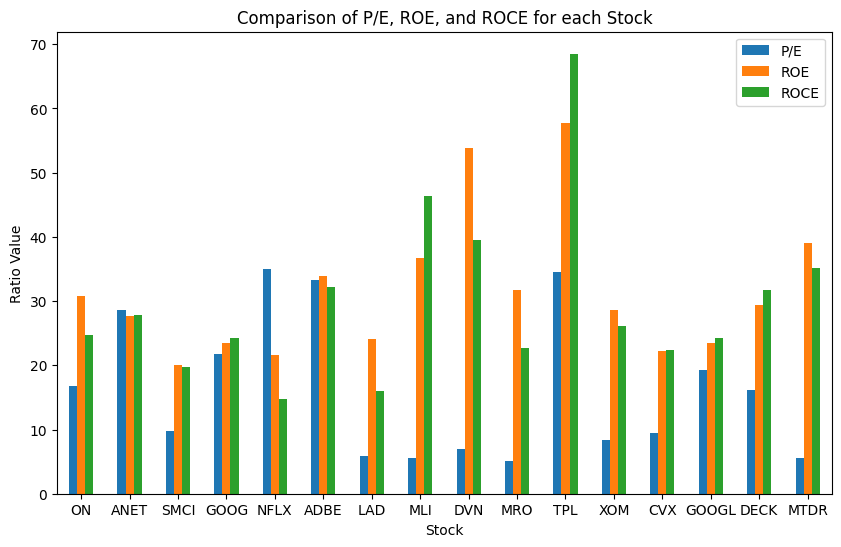

In [14]:
comparison_df = df2[["Symbol", "P/E", "ROE", "ROCE"]]

comparison_df.set_index("Symbol", inplace=True)


# Plot the comparison graph
comparison_df.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Stock")
plt.ylabel("Ratio Value")
plt.title("Comparison of P/E, ROE, and ROCE for each Stock")
plt.xticks(rotation=0)
plt.legend()

plt.show()

## Stock Selection

1. ON Semiconductor Corporation (ON):
   - Sector(s): Technology
   - Industry: Semiconductors
   - Description: ON Semiconductor is an American semiconductor supplier, formerly the semiconductor component division of Motorola Group. It has an industry-leading position in the fields of automotive, industrial and cloud power semiconductor components.
    
     
2. Arista Networks, Inc. (ANET):
   - Sector(s): Technology
   - Industry: Computer Hardware
   - Description: Arista Networks was founded to pioneer and deliver software-driven cloud networking solutions for large data center storage and computing environments.

   
3. Super Micro Computer, Inc. (SMCI):
   - Sector(s): Technology
   - Industry: Computer Hardware
   - Description: Supermicro Computer Co., Ltd., mainly engaged in computer host solutions.

     
4. Alphabet Inc. (GOOG):
   - Sector(s): Communication Services
   - Industry: Internet Content & Information
   - Description: Alphabet, Inc is a holding company engaged in the business of acquiring and operating different companies. It operates through its Google and Other Bets divisions. The Google segment includes its major Internet products.

5. Netflix, Inc. (NFLX):
    - Sector(s): Communication Services
    - Industry: Entertainment
    - Description: Netflix is ​​an OTT service company that provides online on-demand streaming of videos around the world.

      
6. Adobe Inc. (ADBE):
    - Sector(s): Technology
    - Industry: Software - Infrastructure
    - Description: Adobe is mainly engaged in the development of multimedia production software. In recent years, it has also begun to develop software such as rich Internet applications, marketing applications, and financial analysis applications.

7. Lithia Motors, Inc. (LAD)
    - Sector(s): Consumer Cyclical
    - Industry: Auto & Truck Dealerships
    - Description: Lithia Motors is an American nationwide automotive dealership group headquartered.

8. Mueller Industries, Inc. (MLI)
    - Sector(s): Industrials
    - Industry: Metal Fabrication
    - Description: Mueller Industries, Inc. is an industrial manufacturer that specializes in copper and copper alloy manufacturing while also producing goods made from aluminum, steel, and plastics.

9. Devon Energy Corporation (DVN)
    - Sector(s): Energy
    - Industry: Oil & Gas E&P
    - Description: Devon's targets focus on reducing the carbon intensity of our operations, minimizing freshwater use, and engaging constructively with our value chain.

10. Texas Pacific Land Corporation (TPL)
    - Sector(s): Energy
    - Industry: Oil & Gas E&P
    - Description: Texas Pacific Land Trust is one of the largest landowners in the State of Texas with approximately 900000 acres of land in West Texas.

11. Exxon Mobil Corporation (XOM):
    - Sector(s): Energy
    - Industry: Oil & Gas Integrated
    - Description: ExxonMobil is one of the world's largest publicly traded international oil and gas companies.

12. Chevron Corporation (CVX):
    - Sector(s): Energy
    - Industry: Oil & Gas Integrated
    - Description: Chevron Corporation is one of the world's largest multinational energy companies. Its business scope penetrates all aspects of the oil and natural gas industry: exploration, production, refining, marketing, transportation, petrochemicals, power generation, etc.

13. Deckers Outdoor Corporation (DECK):
    - Sector(s): Consumer Cyclical
    - Industry: Footwear & Accessories
    - Description: Deckers Outdoor Corporation, doing business as Deckers Brands, is a footwear designer and distributor based in Goleta, California, United States.

14. Matador Resources Company (MTDR):
    - Sector(s): Energy
    - Industry: Oil & Gas E&P
    - Description: Matador is an independent energy company engaged in the exploration, development, production and acquisition of oil and natural gas resources in the US.

## Capital Asset Pricing Model

**CAPM**, a widely-used financial model, estimates the expected return on an investment based on its systematic risk, commonly known as beta. In this analysis, we utilized the S&P 500 as a benchmark for our portfolio. The CAPM helped us determine the appropriate required rate of return for our investments.

In [15]:
stocks_list = ['ON','ANET','SMCI','GOOG','NFLX','ADBE','LAD','MLI','DVN','TPL','XOM','CVX','DECK','MTDR','^GSPC'] # ^GSPC is S&P500. Don't change or move it.

# Define the start and end dates for the data
start_date = "2019-01-01"
end_date = "2022-12-31"



data = yf.download(stocks_list,start=start_date, end=end_date)['Adj Close'].dropna()

[*********************100%%**********************]  15 of 15 completed


In [16]:
stocks_num = len(stocks_list)-1

# Normalize stock data based on initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[:]:
    x[i] = x[i]/x[i][0]
  return x

# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[:]:
    fig.add_scatter(x = df.index, y = df[i], name = i)
  fig.show()

def daily_return(df):
  df_daily_return = df.copy()
  for i in df.columns[:]:
    for j in range(0, len(df)):
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    df_daily_return[i][0] = 0
  return df_daily_return

interactive_plot(normalize(data), 'Normalized Prices')
stocks_daily_return = daily_return(data)


beta = {}
alpha = {}

for i in stocks_daily_return.columns:
  if i != '^GSPC':
    b, a = np.polyfit(stocks_daily_return['^GSPC'], stocks_daily_return[i], 1)
    beta[i] = b
    alpha[i] = a

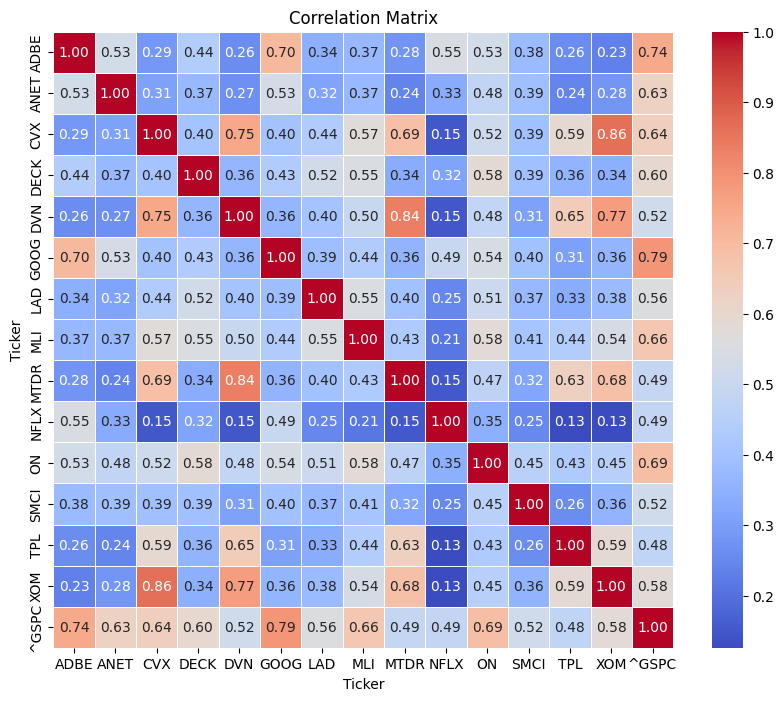

In [17]:
# Calculate the correlation matrix between all stocks
correlation_matrix = stocks_daily_return.corr()

# Visualize the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Correlation coefficient (r)** quantifies the degree to which the prices of two different stocks or financial assets, move in relation to each other. It is represented by the symbol "r" and can take values between -1 and 1.

相关系数量化两种不同股票或金融资产的价格相对移动的程度。 它由符号“r”表示，可以取-1到1之间的值。

Interpretation:

*r > 0*: If one stock goes up, the other tends to go up too. +1 means a perfect match.

*r < 0*: If one stock goes up, the other often goes down. -1 means a perfect opposite match.

*r = 0*: They move independently, no clear connection.

**Beta  (β)** is a measure of a stock's or portfolio's sensitivity to market movements. It quantifies the systematic risk of an investment.

衡量股票对市场变动的敏感度，量化了系统风险。

Interpretation:

β = 1: the stock tends to move in sync with the market.

β > 1: the stock is more volatile (riskier) than the market.

0 < β < 1: the stock is less volatile (less risky) than the market.

β < 0 (negative): the stock moves inversely to the market.

In [18]:
beta

{'ADBE': 1.2328564864282514,
 'ANET': 1.1614865409084014,
 'CVX': 1.053840854406149,
 'DECK': 1.1841379444215137,
 'DVN': 1.4677617677639783,
 'GOOG': 1.1075811315395903,
 'LAD': 1.187120684331468,
 'MLI': 1.2393925097619634,
 'MTDR': 1.8806248798641274,
 'NFLX': 1.0198407575732837,
 'ON': 1.7549356620052805,
 'SMCI': 1.1931803613456669,
 'TPL': 1.1122294702588222,
 'XOM': 0.9118564010038158}

**Alpha (α)** is a measure of the difference between actual return and expected return. (Optional)

衡量实际报酬率与预期的报酬之差

Interpretation:

If the actual return is higher than the expected return, then α > 0, which means the portfolio performed better than expected, otherwise it is α < 0.

In [19]:
alpha

{'ADBE': 0.003999720700290811,
 'ANET': 0.05779607411907258,
 'CVX': 0.03927100535461559,
 'DECK': 0.09053534167539967,
 'DVN': 0.12504228446265617,
 'GOOG': 0.014610781667456108,
 'LAD': 0.08208351532832785,
 'MLI': 0.06717230353228167,
 'MTDR': 0.19758632970954743,
 'NFLX': 0.0038582139561013184,
 'ON': 0.10531000976007641,
 'SMCI': 0.15838385276637856,
 'TPL': 0.147034730362557,
 'XOM': 0.04557968648376033}

In [20]:
stocks_daily_return

Ticker,ADBE,ANET,CVX,DECK,DVN,GOOG,LAD,MLI,MTDR,NFLX,ON,SMCI,TPL,XOM,^GSPC
Date,,,,,,,,,,,,,,,
2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-03,-3.949775,-5.200663,-1.915275,-2.804392,1.335636,-2.848397,0.407254,-4.265200,-0.871198,1.322577,-6.734213,3.973506,0.286025,-1.535365,-2.475673
2019-01-04,4.863239,1.437873,2.072391,-3.195292,4.464309,5.378616,4.068971,4.411138,6.905200,9.723449,5.431312,-0.891716,4.253966,3.686976,3.433571
2019-01-07,1.357262,3.679556,1.299419,2.717791,3.174585,-0.216681,2.460408,2.027856,7.222547,5.971700,3.030303,0.899739,4.696868,0.520004,0.701043
2019-01-08,1.491755,2.076982,-0.436478,0.735410,0.788945,0.738496,-0.737054,1.987560,3.504956,1.563390,-2.705877,-0.636939,1.224406,0.727072,0.969529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.573524,-0.498468,3.091562,0.573791,3.992678,1.756170,3.326846,-0.797879,4.196315,-0.937031,0.434643,0.231710,1.990254,2.644494,0.586810
2022-12-27,-0.992766,-0.759786,1.257071,1.527362,1.167823,-2.093305,-0.832185,0.971852,0.840475,-3.658116,-1.650904,0.851681,-1.138711,1.389414,-0.404962
2022-12-28,-2.017371,0.260809,-1.475273,-1.426268,-3.716009,-1.671786,-2.087911,-2.771323,-3.976377,-2.565369,-1.760107,-2.762699,-5.577001,-1.642628,-1.202064


In [21]:
keys = list(beta.keys())
ER = {}

rf = 0
rm = stocks_daily_return['^GSPC'].mean() * 252

for i in keys:
  ER[i] = rf + (beta[i] * (rm-rf))

for i in keys:
  print("Annual Expected Return Based on CAPM for {} is {:.2f}%".format (i, ER[i]))

Annual Expected Return Based on CAPM for ADBE is 16.35%
Annual Expected Return Based on CAPM for ANET is 15.41%
Annual Expected Return Based on CAPM for CVX is 13.98%
Annual Expected Return Based on CAPM for DECK is 15.71%
Annual Expected Return Based on CAPM for DVN is 19.47%
Annual Expected Return Based on CAPM for GOOG is 14.69%
Annual Expected Return Based on CAPM for LAD is 15.75%
Annual Expected Return Based on CAPM for MLI is 16.44%
Annual Expected Return Based on CAPM for MTDR is 24.95%
Annual Expected Return Based on CAPM for NFLX is 13.53%
Annual Expected Return Based on CAPM for ON is 23.28%
Annual Expected Return Based on CAPM for SMCI is 15.83%
Annual Expected Return Based on CAPM for TPL is 14.75%
Annual Expected Return Based on CAPM for XOM is 12.10%


In [22]:
portfolio_weights = 1/stocks_num * np.ones(stocks_num)
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
print(f"Annual Expected Return Based on CAPM for the Portfolio is {ER_portfolio:.2f}% \n")

Annual Expected Return Based on CAPM for the Portfolio is 16.59% 



In [23]:
def calculate_portfolio_returns(stock_returns, weights):
    """
    Calculate the portfolio daily returns based on allocation weights and stock returns.

    Parameters:
    - stock_returns (pandas.DataFrame): A DataFrame containing daily returns of individual stocks.
    - weights (list or numpy.ndarray): A list or array containing allocation weights for each stock.

    Returns:
    - portfolio_returns (pandas.Series): A Series containing daily portfolio returns.
    """
    portfolio_returns = stock_returns.dot(weights)
    return portfolio_returns

[*********************100%%**********************]  15 of 15 completed


Portfolio Total Return: 48.27%
S&P 500 Total Return: 24.73%


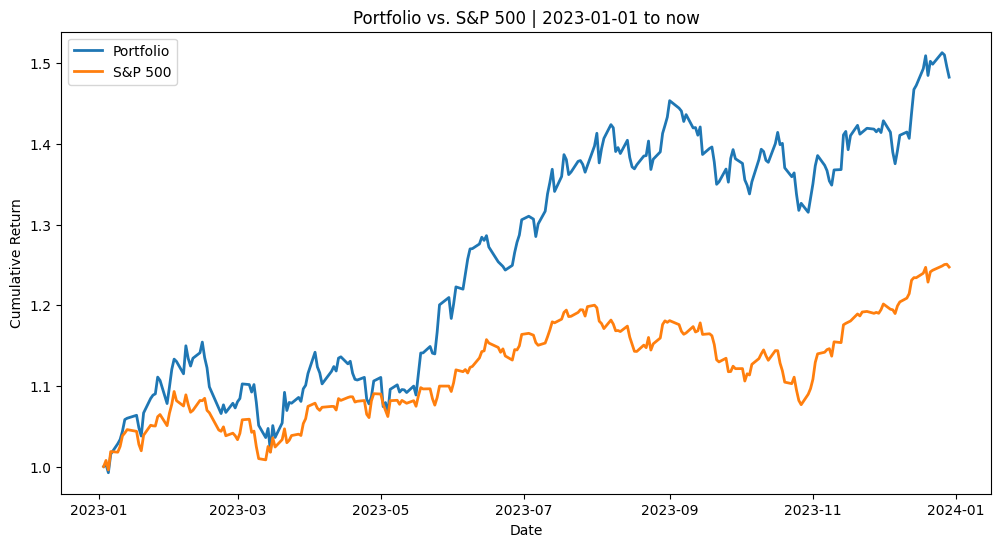

In [24]:
start_date = "2023-01-01"
end_date = "2023-12-31"

data = yf.download(stocks_list,start=start_date, end=end_date)['Adj Close'].dropna()
stocks_daily_return = daily_return(data)

# Calculate portfolio daily returns based on allocation weights and stock returns
portfolio_daily_returns = calculate_portfolio_returns(stocks_daily_return.drop(columns=['^GSPC']), portfolio_weights)

# Calculate cumulative returns for the portfolio in  2023
portfolio_cumulative_returns = (1 + (portfolio_daily_returns / 100)).cumprod()
portfolio_total_return = (portfolio_cumulative_returns[-1] - 1) * 100

# Display the S&P 500 Total Return
print(f"Portfolio Total Return: {portfolio_total_return:.2f}%")

# Calculate the S&P 500 Total Return
sp500_cumulative_returns = (1 + stocks_daily_return['^GSPC'] / 100).cumprod()
sp500_total_return = (sp500_cumulative_returns[-1] - 1) * 100

# Display the S&P 500 Total Return
print(f"S&P 500 Total Return: {sp500_total_return:.2f}%")

# Plot portfolio cumulative returns and compare to S&P 500
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, label='Portfolio', linewidth=2)
plt.plot(stocks_daily_return.index, sp500_cumulative_returns, label='S&P 500', linewidth=2)
plt.title('Portfolio vs. S&P 500 | 2023-01-01 to now')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


We constructed a portfolio with uniform weighting and evaluated its performance. The portfolio's total return was calculated to be **50.95%**, indicating the cumulative return achieved throughout the designated holding period.

In [25]:
interactive_plot(normalize(data), 'Cumulative Return')

In [26]:
normalize(data)

Ticker,ADBE,ANET,CVX,DECK,DVN,GOOG,LAD,MLI,MTDR,NFLX,ON,SMCI,TPL,XOM,^GSPC
Date,,,,,,,,,,,,,,,
2023-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-01-04,1.013327,0.941527,0.989367,1.001824,1.013421,0.988963,1.037934,1.016494,1.011663,1.049025,1.009576,0.980801,0.978360,1.002910,1.007539
2023-01-05,0.974831,0.905550,1.007184,1.015030,1.035272,0.967336,1.023765,0.999490,1.003386,1.050008,0.969648,0.956952,0.960811,1.025350,0.995806
2023-01-06,0.987623,0.930031,1.014771,1.021427,1.053510,0.982832,1.053147,1.027886,1.031227,1.069842,1.013959,1.006320,0.983449,1.037743,1.018551
2023-01-09,1.015018,0.950045,1.006839,1.042700,1.070200,0.989967,1.087650,1.043360,1.059443,1.068554,1.049343,1.010851,0.981732,1.018402,1.017769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1.777128,1.970557,0.902264,1.782211,0.836641,1.591081,1.610309,1.635618,1.097167,1.650314,1.363577,3.454806,0.774486,0.989479,1.243320
2023-12-26,1.775674,1.964519,0.910388,1.767541,0.852165,1.592196,1.634903,1.658421,1.128591,1.665333,1.387275,3.509778,0.785372,0.991712,1.248581
2023-12-27,1.769203,1.966173,0.907401,1.766976,0.847416,1.576812,1.645722,1.660839,1.123068,1.667367,1.380458,3.517768,0.784662,0.987052,1.250367


## Portfolio Evaluation

In [27]:
stocks_cumulative_returns = (1 + (stocks_daily_return / 100)).cumprod()
stocks_cumulative_returns = stocks_cumulative_returns.drop(columns=['^GSPC'])
stocks_cumulative_returns["Mean"] = stocks_cumulative_returns.mean(axis=1)

returns = (stocks_cumulative_returns.iloc[-1] -1).array
portfolio_variance = np.dot(portfolio_weights.T, np.dot(np.cov(returns), portfolio_weights))
portfolio_sd = np.sqrt(portfolio_variance)

risk_free_rate = 0.05
sharpe_ratio = np.mean(returns - risk_free_rate) / portfolio_sd
information_ratio = np.mean(returns - ((1 + (stocks_daily_return / 100)).cumprod()["^GSPC"][-1] - 1)) / portfolio_sd

print("----------------------------------2023----------------------------------")
print("Sharpe Ratio:", sharpe_ratio)
print("Information Ratio:", information_ratio)

----------------------------------2023----------------------------------
Sharpe Ratio: 2.699430553181318
Information Ratio: 1.553599029580771



To assess risk-adjusted returns, we computed the Sharpe Ratio and Information Ratio for the portfolio. The Sharpe Ratio measures the excess return earned by the portfolio per unit of risk, while the Information Ratio evaluates the portfolio's risk-adjusted performance relative to the benchmark. Our portfolio demonstrated **a Sharpe Ratio of 2.75 and an Information Ratio of 1.65, indicating favorable risk-adjusted returns**.

In [28]:
monthly_returns = stocks_daily_return.resample('M').sum()

monthly_SP500_cumulative_returns = (1 + (monthly_returns['^GSPC'] / 100)).cumprod()
monthly_cumulative_returns = (1 + (monthly_returns / 100)).cumprod().drop(columns=['^GSPC'])


for month in reversed(range(1, len(monthly_cumulative_returns))):
    monthly_cumulative_returns.index[-(month)]
    print(f"----------------------------------{str(monthly_cumulative_returns.index[-month]).split()[0]}----------------------------------")
    returns = (monthly_cumulative_returns.iloc[-(month)] - monthly_cumulative_returns.iloc[-(month+1)]).array
    portfolio_variance = np.dot(portfolio_weights.T, np.dot(np.cov(returns), portfolio_weights))
    portfolio_sd = np.sqrt(portfolio_variance)
    risk_free_rate = 0.05/12
    sharpe_ratio = np.mean(returns - risk_free_rate) / portfolio_sd
    print("Sharpe Ratio:", sharpe_ratio)

    risk_free_rate = monthly_SP500_cumulative_returns[-(month)] - monthly_SP500_cumulative_returns[-(month+1)]
    information_ratio = np.mean(returns - risk_free_rate) / portfolio_sd
    print("Information Ratio:", information_ratio)

----------------------------------2023-02-28----------------------------------
Sharpe Ratio: -0.9291157579263282
Information Ratio: -0.06767564895676327
----------------------------------2023-03-31----------------------------------
Sharpe Ratio: 1.52007811155103
Information Ratio: 0.32061166001256636
----------------------------------2023-04-30----------------------------------
Sharpe Ratio: -0.7396541071055542
Information Ratio: -1.3570651661160842
----------------------------------2023-05-31----------------------------------
Sharpe Ratio: 1.1723479697166452
Information Ratio: 1.181280965320155
----------------------------------2023-06-30----------------------------------
Sharpe Ratio: 4.056667834499743
Information Ratio: 1.8299242934738411
----------------------------------2023-07-31----------------------------------
Sharpe Ratio: 1.885616263536136
Information Ratio: 1.3016302333612253
----------------------------------2023-08-31----------------------------------
Sharpe Ratio: -0.046

## Portfolio Optimization

### 1. Mean Variance Optimization

In [29]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting

start_date = "2019-01-01"
end_date = "2022-12-31"

data = yf.download(stocks_list,start=start_date, end=end_date)['Adj Close'].dropna()

portfolio = data.drop(columns=['^GSPC'])
mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()


ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

ef.portfolio_performance(verbose=True)

[*********************100%%**********************]  15 of 15 completed


{'ADBE': 0.0, 'ANET': 0.01491, 'CVX': 0.0, 'DECK': 0.13872, 'DVN': 0.0, 'GOOG': 0.0, 'LAD': 0.0, 'MLI': 0.0, 'MTDR': 0.0, 'NFLX': 0.0, 'ON': 0.0, 'SMCI': 0.49267, 'TPL': 0.3537, 'XOM': 0.0}
Expected annual return: 46.9%
Annual volatility: 39.2%
Sharpe Ratio: 1.14


(0.46915246360788126, 0.39235184292865793, 1.1447696033622339)

**We employed Mean-Variance Optimization to enhance our portfolio's performance.** Through this process, we achieved a more efficient allocation of assets. The optimized portfolio demonstrated an expected annual return of **46.9%%** and annual volatility of **39.2%**. The resulting Sharpe Ratio improved further to **1.14**, indicating **superior risk-adjusted returns**.

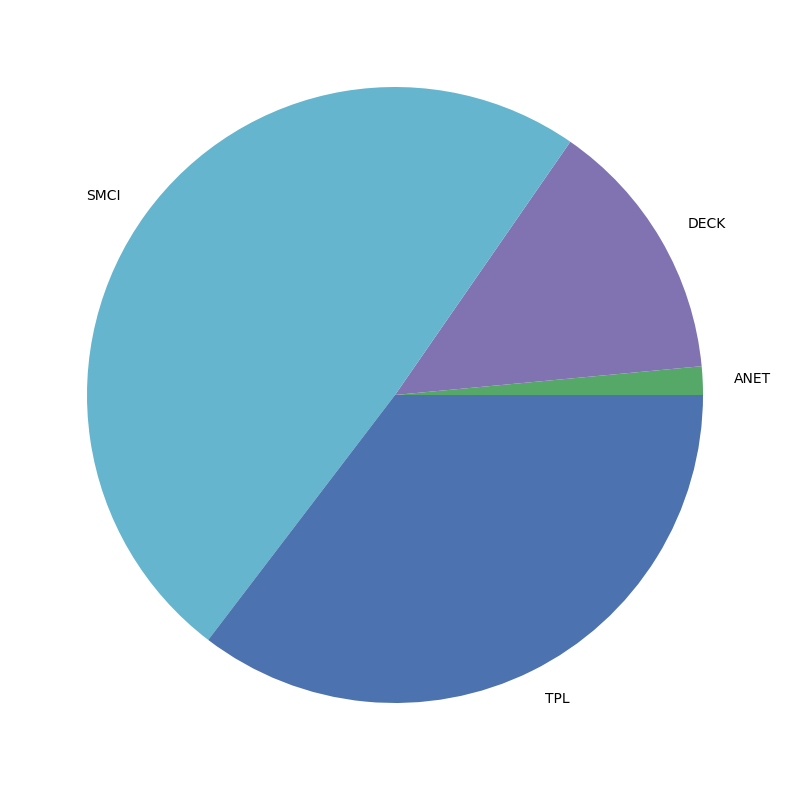

In [30]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [31]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)

# Number of shares of each stock to purchase
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'SMCI': 6000, 'TPL': 152, 'DECK': 348, 'ANET': 123}
Funds remaining: $812.09


In [32]:
portfolio_weights = []
for stock in weights:
  portfolio_weights.append(weights[stock])
portfolio_weights = np.array(portfolio_weights)

[*********************100%%**********************]  15 of 15 completed


Portfolio Total Return: 95.13%
S&P 500 Total Return: 24.73%


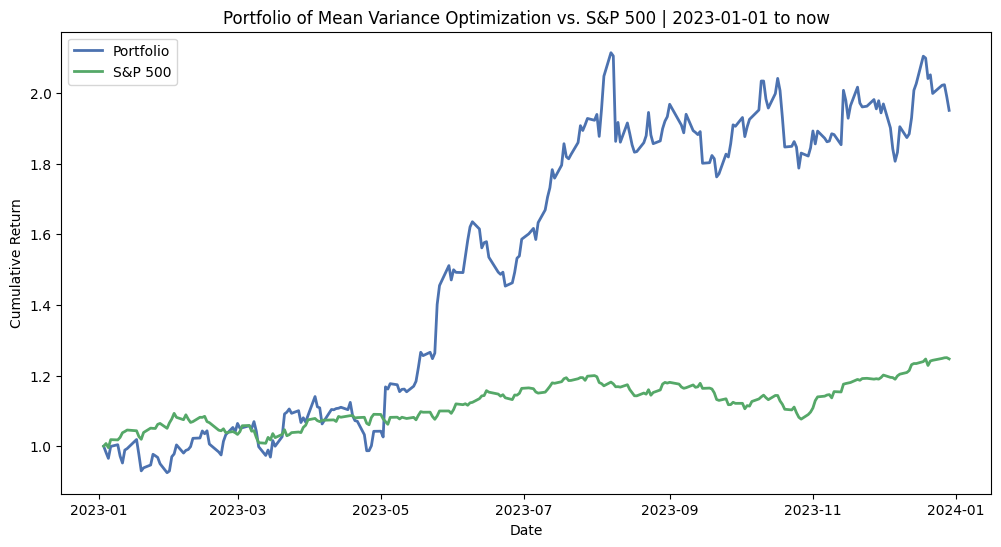

In [33]:
start_date = "2023-01-01"
end_date = "2023-12-31"

data = yf.download(stocks_list,start=start_date, end=end_date)['Adj Close'].dropna()
stocks_daily_return = daily_return(data)

# Calculate portfolio daily returns based on allocation weights and stock returns
portfolio_daily_returns = calculate_portfolio_returns(stocks_daily_return.drop(columns=['^GSPC']), portfolio_weights)

# Calculate cumulative returns for the portfolio in  2023
portfolio_cumulative_returns = (1 + (portfolio_daily_returns / 100)).cumprod()
portfolio_total_return = (portfolio_cumulative_returns[-1] - 1) * 100

# Display the S&P 500 Total Return
print(f"Portfolio Total Return: {portfolio_total_return:.2f}%")

# Calculate the S&P 500 Total Return
sp500_cumulative_returns = (1 + stocks_daily_return['^GSPC'] / 100).cumprod()
sp500_total_return = (sp500_cumulative_returns[-1] - 1) * 100

# Display the S&P 500 Total Return
print(f"S&P 500 Total Return: {sp500_total_return:.2f}%")

# Plot portfolio cumulative returns and compare to S&P 500
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, label='Portfolio', linewidth=2)
plt.plot(stocks_daily_return.index, sp500_cumulative_returns, label='S&P 500', linewidth=2)
plt.title('Portfolio of Mean Variance Optimization vs. S&P 500 | 2023-01-01 to now')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [34]:
stocks_cumulative_returns = (1 + (stocks_daily_return / 100)).cumprod()
stocks_cumulative_returns = stocks_cumulative_returns.drop(columns=['^GSPC'])
stocks_cumulative_returns["Mean"] = stocks_cumulative_returns.mean(axis=1)

returns = (stocks_cumulative_returns.iloc[-1] -1).array
portfolio_variance = np.dot(portfolio_weights.T, np.dot(np.cov(returns), portfolio_weights))
portfolio_sd = np.sqrt(portfolio_variance)

risk_free_rate = 0.05
sharpe_ratio = np.mean(returns - risk_free_rate) / portfolio_sd
information_ratio = np.mean(returns - ((1 + (stocks_daily_return / 100)).cumprod()["^GSPC"][-1] - 1)) / portfolio_sd

print("----------------------------------2023----------------------------------")
print("Sharpe Ratio:", sharpe_ratio)
print("Information Ratio:", information_ratio)

----------------------------------2023----------------------------------
Sharpe Ratio: 1.1592760536981297
Information Ratio: 0.6671963277288524


### 2. Comparison of Optimized and Uniform Weighting Portfolios

The optimized portfolio achieved a total return of 99.92%, while the portfolio with uniform weighting yielded a total return of 50.95%. This significant difference in returns highlights the effectiveness of portfolio optimization in enhancing investment performance.

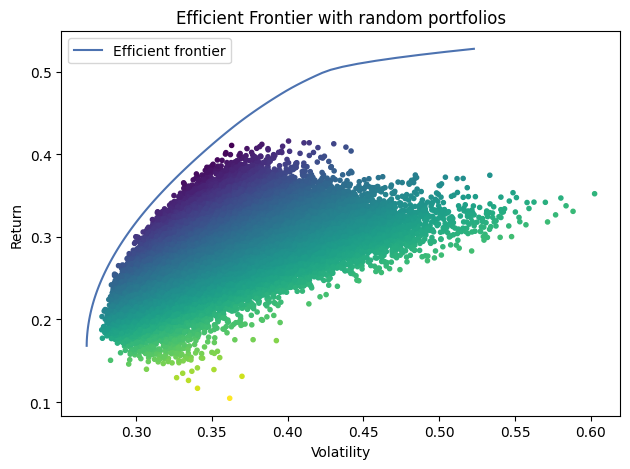

In [35]:
from pypfopt import plotting

n_samples = 100000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds


# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

### 2. Hierarchical Risk Parity (HRP)

In [36]:
from pypfopt import HRPOpt
returns = portfolio.pct_change().dropna()
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()
hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

Expected annual return: 33.1%
Annual volatility: 30.5%
Sharpe Ratio: 1.02
{'ADBE': 0.08288748511010637, 'ANET': 0.09853626132321619, 'CVX': 0.07882757290774285, 'DECK': 0.08178411537401259, 'DVN': 0.02546126075863188, 'GOOG': 0.11574559633091112, 'LAD': 0.07522259879962226, 'MLI': 0.09257771012555344, 'MTDR': 0.033735578654938536, 'NFLX': 0.06518371182716348, 'ON': 0.04452988259627584, 'SMCI': 0.08493878467714225, 'TPL': 0.03940311799657288, 'XOM': 0.08116632351811036}


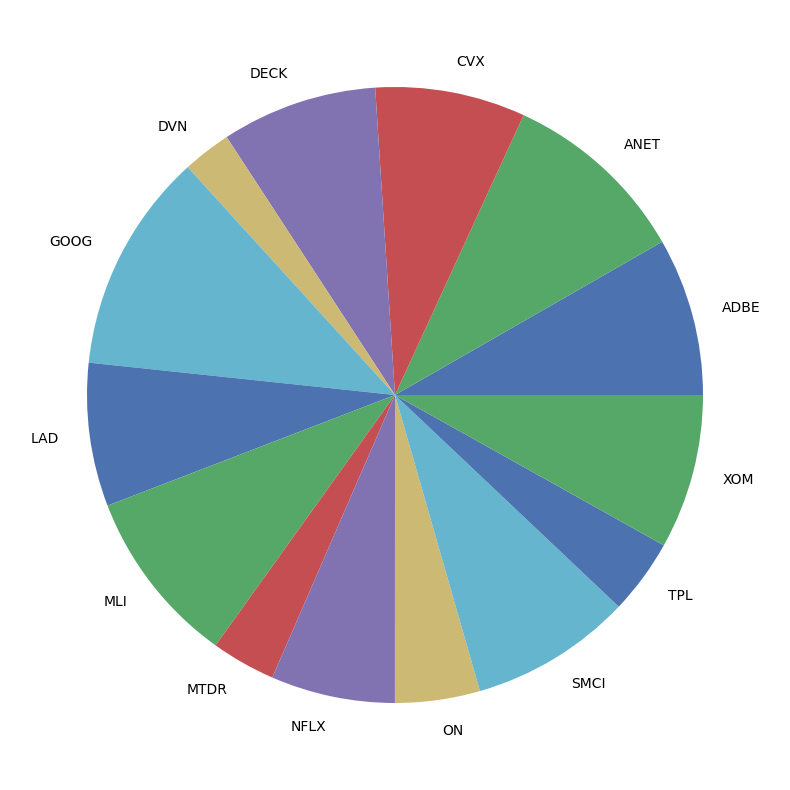

In [37]:
pd.Series(hrp_weights).plot.pie(figsize=(10, 10));

In [38]:
portfolio_weights = []
for stock in hrp_weights:
  portfolio_weights.append(hrp_weights[stock])
portfolio_weights = np.array(portfolio_weights)

[*********************100%%**********************]  15 of 15 completed


Portfolio Total Return: 60.90%
S&P 500 Total Return: 24.73%


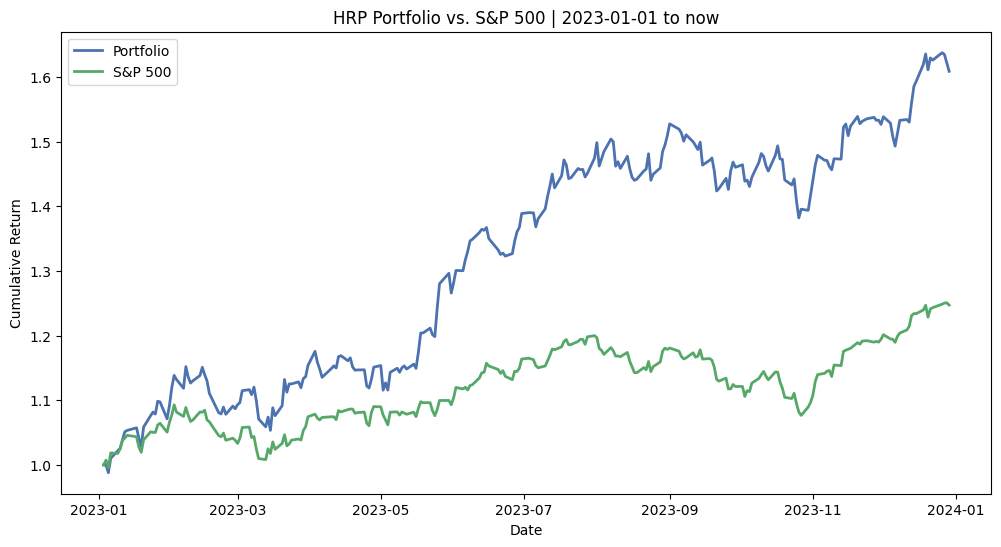

In [39]:
start_date = "2023-01-01"
end_date = "2023-12-31"

data = yf.download(stocks_list,start=start_date, end=end_date)['Adj Close'].dropna()
stocks_daily_return = daily_return(data)

# Calculate portfolio daily returns based on allocation weights and stock returns
portfolio_daily_returns = calculate_portfolio_returns(stocks_daily_return.drop(columns=['^GSPC']), portfolio_weights)

# Calculate cumulative returns for the portfolio in  2023
portfolio_cumulative_returns = (1 + (portfolio_daily_returns / 100)).cumprod()
portfolio_total_return = (portfolio_cumulative_returns[-1] - 1) * 100

# Display the S&P 500 Total Return
print(f"Portfolio Total Return: {portfolio_total_return:.2f}%")

# Calculate the S&P 500 Total Return
sp500_cumulative_returns = (1 + stocks_daily_return['^GSPC'] / 100).cumprod()
sp500_total_return = (sp500_cumulative_returns[-1] - 1) * 100

# Display the S&P 500 Total Return
print(f"S&P 500 Total Return: {sp500_total_return:.2f}%")

# Plot portfolio cumulative returns and compare to S&P 500
plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, label='Portfolio', linewidth=2)
plt.plot(stocks_daily_return.index, sp500_cumulative_returns, label='S&P 500', linewidth=2)
plt.title('HRP Portfolio vs. S&P 500 | 2023-01-01 to now')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [40]:
stocks_cumulative_returns = (1 + (stocks_daily_return / 100)).cumprod()
stocks_cumulative_returns = stocks_cumulative_returns.drop(columns=['^GSPC'])
stocks_cumulative_returns["Mean"] = stocks_cumulative_returns.mean(axis=1)

returns = (stocks_cumulative_returns.iloc[-1] -1).array
portfolio_variance = np.dot(portfolio_weights.T, np.dot(np.cov(returns), portfolio_weights))
portfolio_sd = np.sqrt(portfolio_variance)

risk_free_rate = 0.05
sharpe_ratio = np.mean(returns - risk_free_rate) / portfolio_sd
information_ratio = np.mean(returns - ((1 + (stocks_daily_return / 100)).cumprod()["^GSPC"][-1] - 1)) / portfolio_sd

print("----------------------------------2023----------------------------------")
print("Sharpe Ratio:", sharpe_ratio)
print("Information Ratio:", information_ratio)

----------------------------------2023----------------------------------
Sharpe Ratio: 2.543078312812742
Information Ratio: 1.463613870072545


## Conclusion

This report highlighted the importance of a systematic approach to stock portfolio management, encompassing fundamental analysis, portfolio evaluation, and optimization. By considering key financial metrics and industry trends, we identified stocks with growth potential. Through portfolio optimization, we achieved significant enhancements in risk-adjusted returns.

**It is crucial to note that the outcomes and conclusions presented in this report are based on simulated data and do not constitute financial advice**. Investors should consider individual risks, conduct thorough research, and seek professional guidance before making investment decisions. This report serves as an educational tool, enabling readers to gain valuable insights into the complexities of stock market investing and portfolio management.